In [1]:
from ase.build import molecule


from ase.io import read
from ase.visualize import view
from math import *
from ase.constraints import FixInternals
import numpy as np

import torchani
model = torchani.models.ANI1x().double()
from ase.optimize import BFGS

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ethan = molecule('C2H6')

In [ ]:
# ethan.set_dihedral(5,1,0,2,angle=360,indices=[2,3,4])

In [ ]:
ethan.get_dihedral(5,1,0,2)

In [ ]:
view(ethan)

In [3]:
ethan.set_calculator(model.ase())

In [4]:
BFGS(ethan).run(fmax=0.0001)

      Step     Time          Energy         fmax
BFGS:    0 14:23:50    -2171.504590        0.0389
BFGS:    1 14:23:50    -2171.504680        0.0233
BFGS:    2 14:23:50    -2171.504770        0.0123
BFGS:    3 14:23:50    -2171.504785        0.0115
BFGS:    4 14:23:50    -2171.504824        0.0063
BFGS:    5 14:23:50    -2171.504829        0.0022
BFGS:    6 14:23:50    -2171.504830        0.0002
BFGS:    7 14:23:50    -2171.504830        0.0000


True

In [5]:
dihedral_indices1 = [5,1,0,2]
En=[]

for i in [0,30,60,90,120,150,180,210,240,270,300,330,360]:
    ethan.set_dihedral(5,1,0,2,angle=i,indices=[2,3,4])
    dihedral1 = [np.deg2rad(i), dihedral_indices1]
    ethan.set_constraint(FixInternals(dihedrals=[dihedral1]))
    BFGS(atoms=ethan,maxstep=0.04).run(fmax=0.0001,steps=1000)
    En.append(ethan.get_potential_energy())

      Step     Time          Energy         fmax
BFGS:    0 14:23:55    -2171.360878        0.2506
BFGS:    1 14:23:55    -2171.362287        0.0866
BFGS:    2 14:23:55    -2171.363183        0.0770
BFGS:    3 14:23:55    -2171.364844        0.1050
BFGS:    4 14:23:55    -2171.365163        0.0540
BFGS:    5 14:23:55    -2171.365293        0.0171
BFGS:    6 14:23:55    -2171.365320        0.0081
BFGS:    7 14:23:55    -2171.365324        0.0034
BFGS:    8 14:23:55    -2171.365325        0.0005
BFGS:    9 14:23:56    -2171.365325        0.0000
      Step     Time          Energy         fmax
BFGS:    0 14:23:56    -2171.436688        0.1403
BFGS:    1 14:23:56    -2171.437352        0.0757
BFGS:    2 14:23:56    -2171.438126        0.0818
BFGS:    3 14:23:56    -2171.439760        0.1778
BFGS:    4 14:23:56    -2171.440966        0.1566
BFGS:    5 14:23:56    -2171.441592        0.0617
BFGS:    6 14:23:56    -2171.441797        0.0410
BFGS:    7 14:23:56    -2171.441930        0.0366
BF

BFGS:    1 14:24:05    -2171.436925        0.0851
BFGS:    2 14:24:05    -2171.438451        0.1144
BFGS:    3 14:24:05    -2171.439934        0.1556
BFGS:    4 14:24:05    -2171.440773        0.0980
BFGS:    5 14:24:05    -2171.441153        0.0512
BFGS:    6 14:24:05    -2171.441397        0.0454
BFGS:    7 14:24:05    -2171.441651        0.0612
BFGS:    8 14:24:05    -2171.441928        0.0572
BFGS:    9 14:24:05    -2171.442170        0.0331
BFGS:   10 14:24:05    -2171.442307        0.0252
BFGS:   11 14:24:05    -2171.442351        0.0131
BFGS:   12 14:24:05    -2171.442361        0.0073
BFGS:   13 14:24:05    -2171.442364        0.0066
BFGS:   14 14:24:05    -2171.442368        0.0065
BFGS:   15 14:24:05    -2171.442372        0.0073
BFGS:   16 14:24:06    -2171.442374        0.0044
BFGS:   17 14:24:06    -2171.442374        0.0012
BFGS:   18 14:24:06    -2171.442374        0.0008
BFGS:   19 14:24:06    -2171.442375        0.0009
BFGS:   20 14:24:06    -2171.442375        0.0005


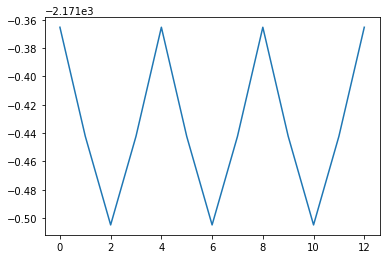

In [6]:
plt.plot(range(13),En)

In [7]:
y = np.array(En)
x = np.array(range(13))

In [8]:
from scipy.interpolate import make_interp_spline, BSpline

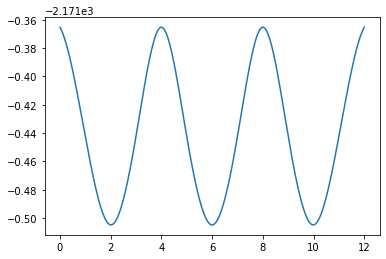

In [9]:
xnew = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(x, y, k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.show()